<img src="./airbnb.png">
<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 5em;">Madrid Data Exploring</span>
</div>

<br />
<div style="text-align: left;">
    <span style="color:#8585BB; font-family: 'Arial'; font-size: 1.5em;">En las siguientes líneas de código estaremos haciendo una exploración de los datos obtenidos de www.insideairbnb.com para la ciudad de Madrid.</span>
</div>

In [159]:
import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np                    
import seaborn as sns
import re
from seaborn.linearmodels import corrplot
from IPython.display import HTML
from collections import Counter

%matplotlib inline 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

('Python version: ', '2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]')
('Pandas version: ', u'0.18.1')
('Today: ', datetime.date(2017, 6, 24))


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Vamos a echar un vistazo a nuestros datasets obtenidos de www.insideairbnb.com<br>
La data obtenida es del 08 de abril de 2017</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Según Insideairbnb.com, la siguiente tabla es: *Detailed Listings data for Madrid*</span>
</div>



In [2]:
listing = pd.read_csv('./listings_1.csv', sep=',')
print 'Dimensión:', listing.shape
listing.head(3)

Dimensión: (13335, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7830063,https://www.airbnb.com/rooms/7830063,20170407214119,2017-04-08,Quiet room in Plaza Mayor,Room in magnificent property in the historic c...,"Based in the historic center of Madrid, to 1 m...",Room in magnificent property in the historic c...,none,"In the historic heart of Madrid, near the Plaz...",Check-in from 21:00 to 23:00 has an extra char...,Very well connected by buses and subwa (Tirso ...,Quiet room on the first floor of historic buil...,Maps and all kind of information and recommend...,Please respect the silence of the other guests...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,41032693,https://www.airbnb.com/users/show/41032693,Bluekitchen,2015-08-10,"Madrid, Community of Madrid, Spain",Somos dos amigos de la infancia de Madrid que ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/41032693/prof...,https://a0.muscache.com/im/users/41032693/prof...,La Latina,7.0,7.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Palacio,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.412275,-3.708718,t,House,Private room,2,2.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Doorm...",NaN,$42.00,$300.00,"$1,200.00",$100.00,$15.00,2,$0.00,2,30,2 weeks ago,NaN,4,13,37,165,2017-04-08,100,2015-08-23,2017-04-02,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,t,moderate,f,f,7,5.04
1,9898596,https://www.airbnb.com/rooms/9898596,20170407214119,2017-04-08,Homely apartment in the heart of Madrid,"Spacious apartment for up to 10 people, with a...",This spacious apartment is located in the cent...,"Spacious apartment for up to 10 people, with a...",none,The Living Santa Ana Apartments are located in...,NaN,We are 3m walk from the La Latina subway.,NaN,"During his stay, please contact us if you have...",The apartment is located in a community of nei...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,50908516,https://www.airbnb.com/users/show/50908516,Daniel,2015-12-09,"Madrid, Community of Madrid, Spain","Somos Amanda y Dani, tenemos este establecimie...",within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/0061d173-a...,https://a0.muscache.com/im/pictures/0061d173-a...,La Latina,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"L

In [3]:
listing.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Según www.insideairbnb.com, la siguiente tabla es: *Summary information and metrics for listings in Madrid (good for visualisations)*.</span>
</div>

In [4]:
listing_sum = pd.read_csv('./listings.csv', sep=',')
print 'Dimensión:', listing_sum.shape
listing_sum.head(3)

Dimensión: (13335, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7830063,Quiet room in Plaza Mayor,41032693,Bluekitchen,Centro,Palacio,40.412275,-3.708718,Private room,42,2,100,2017-04-02,5.04,7,165
1,9898596,Homely apartment in the heart of Madrid,50908516,Daniel,Centro,Palacio,40.411093,-3.708985,Entire home/apt,135,1,68,2017-04-04,4.39,1,230
2,15334645,Piso Muy Luminoso en pleno centro de Madrid,97753616,Will,Centro,Palacio,40.413587,-3.708945,Entire home/apt,81,1,34,2017-03-21,5.57,1,287


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Según Insideairbnb.com, la siguiente tabla es: *Detailed Calendar Data for listings in Madrid*.</span>
</div>

In [5]:
calendar = pd.read_csv('./calendar.csv', sep=',')
calendar.tail(3)

,listing_id,date,available,price
4867272,17829874,2017-04-10,t,$15.00
4867273,17829874,2017-04-09,t,$15.00
4867274,17829874,2017-04-08,f,NaN


In [6]:
#Según Insideairbnb.com, la siguiente tabla es: Detailed Review Data for listings in Madrid
review_sum = pd.read_csv('./reviews_1.csv')
review_sum.head(3)

,listing_id,date
0,15128601,2016-09-25
1,15128601,2016-10-03
2,15128601,2016-10-07


In [7]:
#Según Insideairbnb.com, la siguiente tabla es: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
review = pd.read_csv('./reviews.csv')
review.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15128601,103956852,2016-09-25,48832799,Amparo,"Apartamento muy acogedor, limpio y cómodo, en ..."
1,15128601,105883025,2016-10-03,87158075,Daniela,"La descripción del anuncio era correcta, las f..."
2,15128601,106595943,2016-10-07,10102108,Fabien,Nice and cosy place. Really peaceful and quiet...


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Una vez vistos los datos que podemos obtener de Inside Airbnb, vamos a descartar las tablas resumidas y usar las tablas que tienen mayor cantidad de datos para poder moldearlas a nuestro gusto.<br><br></span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Las tablas que finalmente utilizaremos serán:<br><br>
- listing = pd.read_csv('./listings_1.csv', sep=',')<br>
- calendar = pd.read_csv('./calendar.csv', sep=',')<br>
- review = pd.read_csv('./reviews.csv')</span>
</div>

In [8]:
listing.describe().transpose()

C:\Users\ronny\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
id,13335.0,1.043929e+07,5.517349e+06,1.862800e+04,5.858327e+06,1.157754e+07,1.538489e+07,1.810984e+07
scrape_id,13335.0,2.017041e+13,4.890808e+00,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
host_id,13335.0,3.775842e+07,3.470057e+07,1.745300e+04,7.823688e+06,2.752699e+07,5.799251e+07,1.247534e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,13332.0,9.777453e+00,2.781298e+01,0.000000e+00,NaN,NaN,NaN,5.190000e+02
host_total_listings_count,13332.0,9.777453e+00,2.781298e+01,0.000000e+00,NaN,NaN,NaN,5.190000e+02
latitude,13335.0,4.042073e+01,2.034312e-02,4.033189e+01,4.041009e+01,4.041872e+01,4.042800e+01,4.056274e+01
longitude,13335.0,-3.697255e+00,2.383740e-02,-3.863907e+00,-3.707852e+00,-3.701596e+00,-3.693810e+00,-3.526821e+00
accommodates,13335.0,3.184252e+00,1.990534e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,13285.0,1.251675e+00,5.981173e-01,0.000000e+00,NaN,NaN,NaN,8.000000e+00


<h1 style="font-size:2em;color:#2467C0">Data Cleaning.</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Aunque los datos reales nunca están limpios completamente, necesitamos asegurarnos de limpiarlos lo mayor posible convirtiendo o eliminando valores nulos o faltantes.<br><br></span>
</div>


In [9]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 95 columns):
id                                  13335 non-null int64
listing_url                         13335 non-null object
scrape_id                           13335 non-null int64
last_scraped                        13335 non-null object
name                                13335 non-null object
summary                             12846 non-null object
space                               9700 non-null object
description                         13329 non-null object
experiences_offered                 13335 non-null object
neighborhood_overview               8308 non-null object
notes                               5037 non-null object
transit                             8264 non-null object
access                              7546 non-null object
interaction                         7523 non-null object
house_rules                         8666 non-null object
thumbnail_url                 

In [10]:
#Existe alguna fila NULL?
print listing.isnull().any().any() 
print listing.shape

True
(13335, 95)


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Vamos a tratar de encontrar cuántos valores nulos existen en cada columna!</span>
</div>


In [11]:
listing.isnull().sum(axis=0)

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                    0
summary                               489
space                                3635
description                             6
experiences_offered                     0
neighborhood_overview                5027
notes                                8298
transit                              5071
access                               5789
interaction                          5812
house_rules                          4669
thumbnail_url                        2488
medium_url                           2488
picture_url                             0
xl_picture_url                       2488
host_id                                 0
host_url                                0
host_name                               3
host_since                              3
host_location                     

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">El paso anterior ya nos dió un indicio de que hay varias columnas con datos únicamente nulos.</span>
</div>

<h1 style="font-size:2em;color:#2467C0">Arreglando los Missing Values</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Primero vamos a borrar las columnas cuyos valores sean todos Nulos, ya que no aportan nada. Una de las posibles causas puede haber sido una mala captura de datos.<br><br></span>
</div>

In [12]:
listing.isnull().all()

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                             False
space                               False
description                         False
experiences_offered                 False
neighborhood_overview               False
notes                               False
transit                             False
access                              False
interaction                         False
house_rules                         False
thumbnail_url                       False
medium_url                          False
picture_url                         False
xl_picture_url                      False
host_id                             False
host_url                            False
host_name                           False
host_since                          False
host_location                     

In [13]:
print listing['jurisdiction_names'].unique()
print listing['has_availability'].unique()
print listing['host_acceptance_rate'].unique()

[ nan]
[ nan]
[ nan]


In [14]:
listing.drop('jurisdiction_names', axis=1, inplace=True)
listing.drop('has_availability', axis=1, inplace=True)
listing.drop('host_acceptance_rate', axis=1, inplace=True)

In [15]:
listing.shape

(13335, 92)

<h1 style="font-size:2em;color:#2467C0">Sampling</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Nuestra tabla de datos tiene muchas líneas o registros. Para no afectar el funcionamiento de nuestro ordenador, sólo podemos mirar pocas líneas a la vez. Ahora bien, en vez de mirar las mismas 2, 5 ó 10 líneas principales cada vez, aplicaremos lo siguiente con lo que conseguiremos ver una muestra aleatoria diferente en nuestro head(). De esta manera, nos aseguramos de que los datos no estén en ningún orden particular cuando probamos el muestreo (como tomar filas de arriba o de abajo) al mezclar aleatoriamente las filas.<br><br></span>
</div>

In [16]:
#Shuffle the rows of listing so we get a distributed sample when we display top few rows

listing = listing.reindex(np.random.permutation(listing.index))
listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3066,9959387,https://www.airbnb.com/rooms/9959387,20170407214119,2017-04-08,1-7.Las Cortes.Sol.Madrid Center. 70m2.Bright....,"70m2 Apartment,WIFI, A/C, Heater, 2 Bedrooms. ...","The apartment is very bright, newly renovated,...","70m2 Apartment,WIFI, A/C, Heater, 2 Bedrooms. ...",none,"Cortes district or Las Letras neighborhood, lo...","In Madrid, you will always find people to help...","From the apartment, it will take 10 or 15 minu...","The elevator, please check that the doors are ...",In the apartment I will give you map of the ci...,I hope to be careful as I am with others ... w...,https://a0.muscache.com/im/pictures/c5687351-1...,https://a0.muscache.com/im/pictures/c5687351-1...,https://a0.muscache.com/im/pictures/c5687351-1...,https://a0.muscache.com/im/pictures/c5687351-1...,51176570,https://www.airbnb.com/users/show/51176570,Mar,2015-12-12,"Madrid, Community of Madrid, Spain","Soy una chica extrovertida, amante de la famil...",within a few hours,100%,t,https://a0.muscache.com/im/pictures/89a2d44c-8...,https://a0.muscache.com/im/pictures/89a2d44c-8...,Carabanchel,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Carabanchel, Madrid, 28014, Spain",Carabanchel,Cortes,Centro,Madrid,NaN,28014,Madrid,"Madrid, Spain",ES,Spain,40.415396,-3.698796,f,Apartment,Entire home/apt,7,1.0,2.0,4.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",NaN,$109.00,NaN,NaN,$150.00,$60.00,6,$0.00,1,14,2 days ago,5,16,31,290,2017-04-08,70,2016-03-26,2017-04-04,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,strict,f,f,6,5.54


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Existen otras columnas con datos que no nos interesan, por ellos procederemos a eliminarlas:
<br></span>
</div>

In [17]:
delete = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url','country_code','calendar_last_scraped', 
          'is_location_exact', 'host_neighbourhood', 'picture_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url', 
          'summary', 'description','host_url', 'experiences_offered', 'space', 'neighborhood_overview', 'notes', 'transit', 
          'access', 'interaction', 'house_rules', 'host_about', 'host_response_time', 'host_response_rate', 'square_feet', 
          'license']   
len(delete)

29

In [18]:
for i in range(0,len(delete)):
    listing.drop(delete[i], axis=1, inplace=True)

In [19]:
listing.shape

(13335, 63)

In [20]:
listing = listing.reindex(np.random.permutation(listing.index))
listing.head(1)

,id,name,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
11996,13639082,HABITACION A 20 MINUTOS DEL CENTRO,79117469,Raquel,2016-06-21,ES,f,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",Spain,40.386924,-3.740061,House,Private room,2,2.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Heating,Washer,""F...",$30.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,8 months ago,0,0,0,0,3,2016-07-03,2016-09-24,80.0,10.0,10.0,8.0,9.0,9.0,9.0,t,f,moderate,f,f,2,0.32


In [21]:
listing.price.head()

11996    $30.00
8627     $90.00
7681     $35.00
6884     $65.00
321      $65.00
Name: price, dtype: object

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Debo eliminar el simbolo de dolar en la columna de precio...<br></span>
</div>

In [22]:
def transform_price(df, variables=None):
    """Transform strings of price to numerals
    
    :param df: data framed to be transformed
    :param variables: list of variables to be transformed
    :return: transformed data frame
    """
    df = df.copy()
    for variable in variables:
        df[variable] = df[variable].str.strip('$').str.replace(',', '') \
            # Remove dollar signs and thousands separators
        df[variable] = df[variable].astype(np.float64)
    return df


vars_price = ['cleaning_fee', 'price', 'extra_people', 'weekly_price', 'monthly_price' ]
listing = transform_price(listing, vars_price)

In [23]:
listing['price']

11996      30.0
8627       90.0
7681       35.0
6884       65.0
321        65.0
3568       85.0
2738       90.0
10734     406.0
11654      44.0
10420     130.0
2106       40.0
6253       60.0
3154      130.0
11886      27.0
10439     700.0
9678       27.0
7358      250.0
8983       70.0
2300       37.0
7215       50.0
5981       25.0
6632       70.0
8446       39.0
13018      78.0
6210       30.0
6571      115.0
666        60.0
9880       30.0
7261       60.0
12440      18.0
3100       75.0
10197     110.0
2178       65.0
469       300.0
7049       17.0
11493      20.0
4357       63.0
4519       90.0
5424      150.0
3114      350.0
10415     117.0
2670       65.0
11525      20.0
6069       84.0
1378       40.0
9386       76.0
12794      65.0
11595      30.0
2505       45.0
1132       45.0
1196       55.0
12118      30.0
6836       50.0
12872      25.0
10361      60.0
10215      30.0
5808       60.0
13283      30.0
2488       59.0
10138      30.0
7449       72.0
1243       24.0
2934    

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">También se podría hacer de la siguiente manera:<br><br></span></div>
    
<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.2em;"> listing['price']=listing['price'].str.strip('$').str.replace(',', '') <br>
listing['price'] = pd.to_numeric(listing.price)</span></div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">O tambien, quitamos el símbolo de y el separador de miles en los valores no nulos "NA":
<br><br></span></div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.2em;">listing['price'] = listing.loc[listing.price.notnull()].price.apply(lambda x: re.sub('$', '', x))<br>
listing['price'] = pd.to_numeric(listing.price)
<br></span></div>



<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Seguimos limpiando datos...<br></span>
</div>

In [24]:
variables = ['state', 'city', 'market', 'smart_location', 'country', 'neighbourhood', 'neighbourhood_cleansed',
             'neighbourhood_group_cleansed', 'host_location', 'street']

for i in range(0,len(variables)-1):
    print variables[i]
    print listing[variables[i]].unique()
    print ''

state
['Comunidad de Madrid' 'Community of Madrid'
 '\xe9\xa9\xac\xe5\xbe\xb7\xe9\x87\x8c\xe8\x87\xaa\xe6\xb2\xbb\xe5\x8c\xba'
 'Madrid' nan 'Alicante' 'Espa\xc3\xb1a' 'madrid' ' '
 'Communaut\xc3\xa9 de Madrid' 'La Habana' 'Autonome Gemeinschaft Madrid'
 'Salerno Fisciano'
 '\xe9\xa6\xac\xe5\xbe\xb7\xe9\x87\x8c\xe8\x87\xaa\xe6\xb2\xbb\xe5\x8d\x80'
 '\xe9\xa9\xac\xe5\xbe\xb7\xe9\x87\x8c' '  ' 'Usera' 'Espa\xc5\x84a'
 'Madrid capital' 'Spain' 'Barcelona'
 'Regi\xc3\xa3o Aut\xc3\xb4noma de Madrid' 'Madrid Espa\xc3\xb1a' 'MADRID'
 'Madrid, Spain' 'Espa\xc3\xb1a,Madrid' '28'
 '\xe8\xa5\xbf\xe7\x8f\xad\xe7\x89\x99' 'Valencian Community'
 'Madrid \nMadrid']

city
['Madrid' '\xe9\xa9\xac\xe5\xbe\xb7\xe9\x87\x8c' 'Madrid ' 'Onil' 'madrid'
 ' ' 'MADRID' 'las matas  madrid' 'Pozuelo'
 'Madrid, Vallecas (Fontarr\xc3\xb3n)' 'La Elipa' 'Chueca, Madrid' 'Ventas'
 'La Habana' 'Boadilla del Monte' 'MADRID '
 'Madrid, Comunidad de Madrid, ES' 'San Fernando de Henares'
 'Pozuelo de Alarc\xc3\xb3n' 'Sale

In [25]:
state = ['Community of Madrid', '\xe9\xa9\xac\xe5\xbe\xb7\xe9\x87\x8c\xe8\x87\xaa\xe6\xb2\xbb\xe5\x8c\xba',
         'Regi\xc3\xa3o Aut\xc3\xb4noma de Madrid', 'madrid', '\xe9\xa9\xac\xe5\xbe\xb7\xe9\x87\x8c',
         '\xe9\xa6\xac\xe5\xbe\xb7\xe9\x87\x8c\xe8\x87\xaa\xe6\xb2\xbb\xe5\x8d\x80',
         'Espa\xc3\xb1a', '\xe8\xa5\xbf\xe7\x8f\xad\xe7\x89\x99',
         'Espa\xc3\xb1a,Madrid', 'MADRID', 'Espa\xc5\x84a',
         'Madrid capital', 'Spain', 'Communaut\xc3\xa9 de Madrid',
         'Madrid \nMadrid', 'Madrid Espa\xc3\xb1a', 'Madrid, Spain',
         'Autonome Gemeinschaft Madrid', 'Usera', ' ', '  ', '28','Comunidad de Madrid','']

for i in range(0, len(state)-1):
    listing.loc[(listing.state == state[i]), ['state']] = 'Madrid'


In [26]:
listing.state.unique()

array(['Madrid', nan, 'Alicante', 'La Habana', 'Salerno Fisciano',
       'Barcelona', 'Valencian Community'], dtype=object)

In [27]:
listing.state.value_counts()

Madrid                 13287
Salerno Fisciano           1
Barcelona                  1
La Habana                  1
Alicante                   1
Valencian Community        1
Name: state, dtype: int64

In [28]:
listing = listing[listing.state == 'Madrid']
listing = listing[listing.country == 'Spain']
listing.shape

(13287, 63)

In [29]:
#Limpieza de neighbourhood_group_cleansed
listing.loc[(listing['neighbourhood_group_cleansed'] == 'Tetu\xc3\xa1n'), ['neighbourhood_group_cleansed']] = 'Tetuan'
listing.loc[(listing['neighbourhood_group_cleansed'] == 'Chamart\xc3\xadn'), ['neighbourhood_group_cleansed']] = 'Chamartin'
listing.loc[(listing['neighbourhood_group_cleansed'] == 'Chamber\xc3\xad'), ['neighbourhood_group_cleansed']] = 'Chamberi'
listing.loc[(listing['neighbourhood_group_cleansed'] == 'Vic\xc3\xa1lvaro'), ['neighbourhood_group_cleansed']] = 'Vicalvario'

In [30]:
listing.neighbourhood_group_cleansed.value_counts()

Centro                   6754
Chamberi                  958
Salamanca                 882
Arganzuela                788
Tetuan                    463
Moncloa - Aravaca         445
Retiro                    438
Latina                    379
Chamartin                 360
Carabanchel               357
Ciudad Lineal             309
Puente de Vallecas        222
Hortaleza                 185
Fuencarral - El Pardo     169
Usera                     144
San Blas - Canillejas     117
Villaverde                 83
Barajas                    80
Moratalaz                  74
Villa de Vallecas          46
Vicalvario                 34
Name: neighbourhood_group_cleansed, dtype: int64

In [60]:
col_to_delete = ['host_location', 'neighbourhood', 'country','street', 'smart_location','market', 'city', 'state', 'neighbourhood_cleansed']

In [61]:
for i in range(0,len(col_to_delete)):
    listing.drop(col_to_delete[i], axis=1, inplace=True)

listing.shape

(13287, 54)

In [59]:
listing.isnull().sum(axis=0)

id                                     0
name                                   0
host_id                                0
host_name                              3
host_since                             3
host_is_superhost                      3
host_listings_count                    3
host_total_listings_count              3
host_verifications                     0
host_has_profile_pic                   3
host_identity_verified                 3
street                                 0
neighbourhood_group_cleansed           0
zipcode                              439
latitude                               0
longitude                              0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             49
bedrooms                              23
beds                                  49
bed_type                               0
amenities                              0
price           

<h1 style="font-size:2em;color:#2467C0">¿Qué precio y características tienen los pisos más costosos de mi dataset?</h1>
<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Sería interesante conocer qué precios tienen los pisos más costosos de mi dataset y qué carácteristicas tienen.<br><br></span>
</div>

In [110]:
outliers = listing[listing['price'] >= 1000]
outliers['price'].value_counts()

1000.0    3
3000.0    2
3189.0    1
7700.0    1
1890.0    1
1200.0    1
Name: price, dtype: int64

In [114]:
outliers.sort_values('price')

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
10667,16199273,"Private Room in Rios Rosas, Madrid",102392514,Hemant,2016-11-03,f,1.0,1.0,"['email', 'phone']",t,f,Chamberi,28003,40.441251,-3.697699,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,Heating,""Famil...",1000.0,NaN,NaN,$100.00,15.0,1,5.0,1,15,4 months ago,29,59,89,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,moderate,f,f,1,NaN
5814,10715621,Lujoso apartamento en Gran Vìa 48,3256859,Fer & Fran,2012-08-14,f,14.0,14.0,"['email', 'phone', 'reviews', 'jumio']",t,t,Centro,28013,40.421617,-3.705310,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",1000.0,NaN,NaN,NaN,NaN,2,15.0,2,1125,yesterday,6,34,64,160,4,2016-02-24,2016-08-03,80.0,9.0,9.0,7.0,6.0,8.0,9.0,t,t,strict,f,f,8,0.29
957,10495669,Ático centrico y tranquilo / Atic,46129526,Elisa,2015-10-09,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Centro,28013,40.421374,-3.710629,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",1000.0,NaN,NaN,NaN,20.0,2,5.0,1,1125,7 months ago,29,49,79,354,42,2016-01-14,2016-09-13,91.0,10.0,9.0,9.0,9.0,10.0,9.0,t,t,flexible,f,f,1,2.79
2246,14574259,"LONGTERM welcome-New,Central,100m² for 1-6 Per...",90311483,Tobias,2016-08-16,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Centro,28005,40.409006,-3.710069,Apartment,Entire home/apt,6,2.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",1200.0,NaN,NaN,$500.00,50.0,1,0.0,3,1125,2 months ago,0,0,0,189,2,2016-08-27,2017-01-03,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,1,0.27
8855,6681279,Fantastico Piso Barrio de Salamanca,34972297,Juan Andres,2015-06-04,f,1.0,1.0,"['email', 'phone']",t,f,Salamanca,28006,40.434467,-3.682262,Condominium,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Air conditioning"",Kitchen,Doorman,""Elevat...",1890.0,1843.0,1843.0,NaN,NaN,1,0.0,1,1125,8 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,strict,f,f,1,NaN
7993,361488,RETIRO PARK2 CHALET INDUSTRIAL-CHIC,1732442,Anouk,2012-02-10,f,12.0,12.0,"['email', 'phone', 'reviews', 'jumio']",t,t,Retiro,28007,40.409084,-3.673131,Chalet,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free parking on ...",3000.0,910.0,2910.0,"$3,000.00",100.0,1,250.0,5,365,2 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,strict,f,f,12,NaN
8002,1727101,RETIRO PARK1 CHALET INDUSTRIAL-CHIC,1732442,Anouk,2012-02-10,f,12.0,12.0,"['email', 'phone', 'reviews', 'jumio']",t,t,Retiro,28007,40.410194,-3.671795,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free parking on ...",3000.0,910.0,2910.0,"$3,000.00",100.0,1,250.0,5,1125,2 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,f,f,12,NaN
8027,2744574,Mansion with royal garden,9631554,K&S,2013-10-25,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,Salamanca,-,40.423505,-3.689261,House,Entire home/apt,10,6.0,4.0,9.0,Real Bed,{},3189.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,5 weeks ago,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,f,f,1,NaN
10828,1

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Podemos sacar varias conclusiones:<br> <br>
    - 1) Existe un alquiler de 7700 Euros por noche, por una habitación! A menos que sea una habitación del Palacio Real, no lo creo muy real. Eliminamos este regitro (id=1250842)<br>
    - 2) Existe otro registro, que es una habitación de alquiler por 1000 euros la noche. Parece no tener mucho sentido. (id=16199273)<br>
    - 3) Existen pisos que en el campo 'number_of_reviews' tienen cero comentarios. Esto indica que nunca han sido alquilados. Tomando en consideración el precio, pueden ser considerados como outliers. Eliminar.<br></span>
</div>


In [126]:
id_to_delete = [6681279, 361488, 1727101, 2744574, 1250842, 16199273]
for i in range(0,len(id_to_delete)):
    listing = listing[listing['id'] != id_to_delete[i] ]

In [127]:
#outliers.dropna(subset=['reviews_per_month'])

<div style="text-align: left;"><br><br><br><br><br>
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">De momento hemos limpiado los datos...<br><br><br><br></span>
</div>

<h1 style="font-size:2em;color:#2467C0">Matriz de correlación</h1>

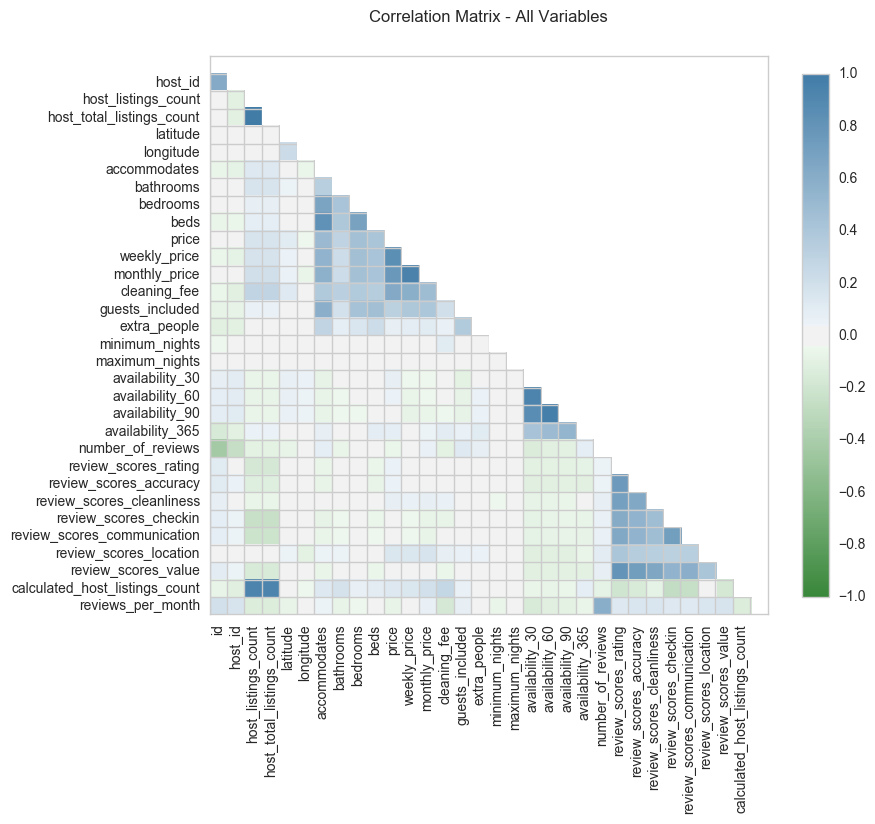

In [310]:
sns.set(style="whitegrid")
# Generate a custom diverging colormap
cmap = sns.diverging_palette(128, 240, as_cmap=True)
f, ax = plt.subplots(figsize=(9, 9))
corrplot(listing, annot=False, sig_stars=False, diag_names=False, ax=ax, cmap=cmap)
plt.title('Correlation Matrix - All Variables')
plt.show()

<h1 style="font-size:2em;color:#2467C0">Análisis de correlación entre features</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Ahora haremos un análisis para verificar qué correlación existe, por ejemplo, entre las camas (beds) y el precio de alquiler del piso (price). (Usando el coeficiente de correlación de Pearson)<br><br></span>
</div>


In [35]:
listing['beds'].corr(listing['price'])

0.3414262902661877

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Vemos que el coheficiente de correlación de Pearson para estas dos columnas es 0.34. <br><br>
Pearson va desde -1 a +1. Un valor de 0 nos dice que no existe correlación, así que no debemos molestarnos en mirar ese atributo. Un valor de 0.34 nos dice que hay algo de correlación, aunque podría ser más fuerte.<br><br>
Al menos, tenemos estos atributos que están ligeramente correlacionados. Esto nos da la esperanza de que podríamos ser capaces de construir un predictor significativo utilizando estas características "débilmente" correlacionadas.<br><br>
A continuación, crearemos una lista de características en las que quisiéramos iterar la misma operación.<br><br></span>
</div>


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Creamos una lista de potenciales *Features* en los cuáles nos gustaría saber su correlación: </span>
</div>

In [140]:
potentialFeatures = ['accommodates','bathrooms', 'bedrooms','beds',
                     'weekly_price','monthly_price','extra_people','minimum_nights','maximum_nights','availability_30',
                     'availability_60','availability_90','availability_365','review_scores_rating','review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                     'review_scores_value','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
El bucle a continuación, nos va a indicar cómo cada unos de los features de la lista anterior, están relacionados con el *feature* "price"... Esto nos ayudará a ver qué relación existe...<br><br>

Todo esto lo hago para entender los datos, entender relaciones, ver la data y poder así ir dándole forma, ya que será importante entender qué factores podrían afectar el precio de alquiler de un piso.</span>
</div>

In [141]:
# check how the features are correlated with the price

for f in potentialFeatures:
    related = listing['price'].corr(listing[f])
    print("%s: %f" % (f,related))

accommodates: 0.496485
bathrooms: 0.296408
bedrooms: 0.451219
beds: 0.408893
weekly_price: 0.837977
monthly_price: 0.773034
extra_people: 0.077877
minimum_nights: 0.023185
maximum_nights: 0.003349
availability_30: 0.073376
availability_60: 0.051043
availability_90: 0.031986
availability_365: 0.082912
review_scores_rating: 0.052168
review_scores_accuracy: 0.054129
review_scores_cleanliness: 0.077098
review_scores_checkin: -0.018050
review_scores_communication: -0.009445
review_scores_location: 0.137505
review_scores_value: 0.018399
number_of_reviews: -0.046907
calculated_host_listings_count: 0.131569
reviews_per_month: -0.065684


<h1 style="font-size:2em;color:#2467C0">Cuáles *features* tienes la mayor correlación con el precio?</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Mirando los valores de la celda anterior, notamos que: <br>
- accommodates: 0.496485<br>
- bathrooms: 0.296408<br>
- bedrooms: 0.451219<br>
- beds: 0.408893<br>
- weekly_price: 0.837977<br>
- monthly_price: 0.773034 <br>
Son los que tienen las correlaciones más altas con el precio</span>
</div>

<h1 style="font-size:2em;color:#2467C0">Una frase que se debe recordar siempre: </h1><br>
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 5em;">Correlación no Implica Causalidad</span><br><br>
</div>

<h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Vamos a graficar los coheficientes de correlación de cada *feature* con respecto a "Price". Empezamos seleccionando las columnas y creando una lista de coheficientes de correlación, llamada "correlations".</span>
</div>

In [142]:
cols = ['accommodates','bathrooms', 'bedrooms','beds',
                     'weekly_price','monthly_price','extra_people','minimum_nights','maximum_nights','availability_30',
                     'availability_60','availability_90','availability_365','review_scores_rating','review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                     'review_scores_value','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']

In [143]:
# create a list containing Pearson's correlation between 'price' with each column in cols
correlations = [ listing['price'].corr(listing[f]) for f in cols ]

In [144]:
len(cols), len(correlations)

(23, 23)

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Nos aseguramos que el número de *features* seleccionados es igual al número de coheficientes calculados, en este caso 23. En las siguientes celdas mostramos algunos datos y gráficos con estos datos.</span>
</div>

In [145]:
correlations

[0.49648508759082138,
 0.29640832650504018,
 0.45121910677822791,
 0.40889291296163732,
 0.83797713789229211,
 0.77303400367176767,
 0.077877472057990518,
 0.023184715235990354,
 0.003348974260815059,
 0.073376028633346857,
 0.051042708004609909,
 0.031986031661008406,
 0.082912484574159118,
 0.052167933677469726,
 0.054128575662106215,
 0.077098432611730078,
 -0.018050486040235677,
 -0.0094450024185708352,
 0.13750493539155106,
 0.018398770956382978,
 -0.046907066394105072,
 0.1315691939745825,
 -0.065683674753633722]

In [232]:
# Creamos una función para graficar un dataframe con columnas string y valores numéricos.

def plot_dataframe(df, y_label):  
    color='turquoise'
    fig = plt.gcf()
    fig.set_size_inches(18, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75) 
    plt.show()

In [233]:
# Creamos un dataframe usando cols y correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [234]:
df2.head() 

,attributes,correlation
0,accommodates,0.496485
1,bathrooms,0.296408
2,bedrooms,0.451219
3,beds,0.408893
4,weekly_price,0.837977


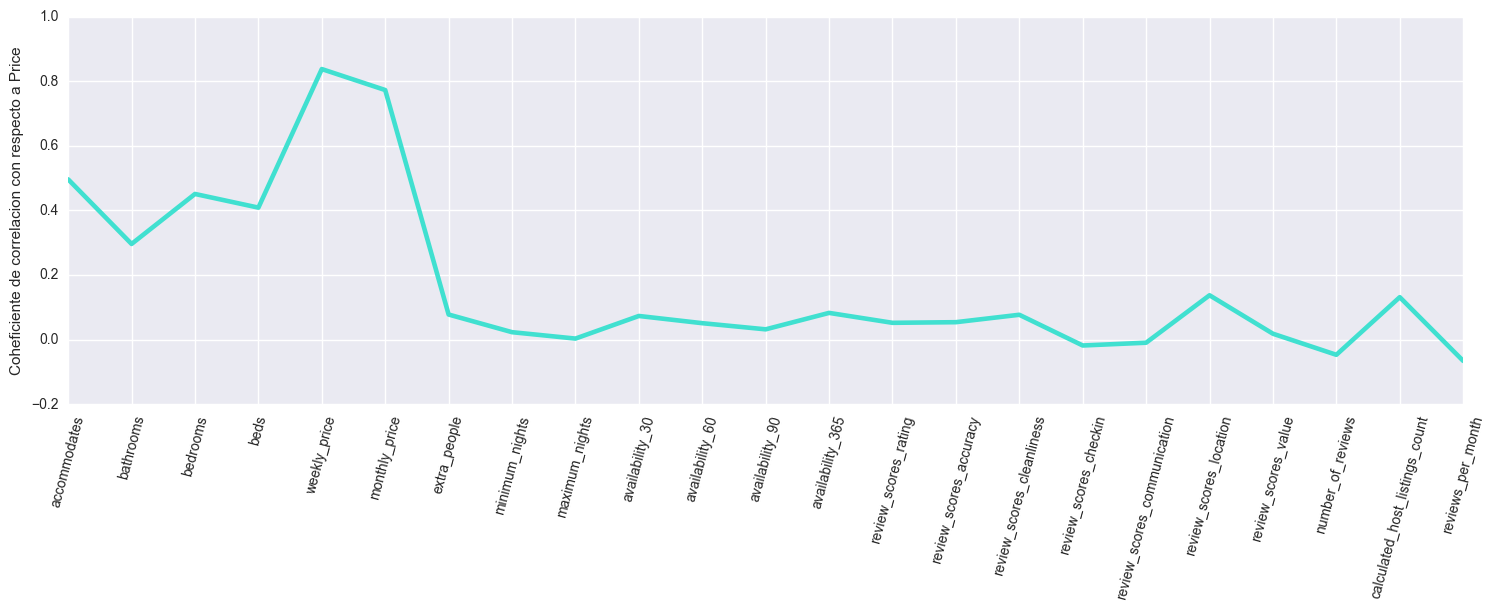

In [235]:
# Graficamos usando la función creada.
plot_dataframe(df2, 'Coheficiente de correlacion con respecto a Price')

<h1 style="font-size:2em;color:#2467C0">Distribución de pisos por zonas:</h1><br>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Ahora haremos algunas gráficas para entender como es la distribución de distintos factores presente en los datos, para conocer diferencia entre zonas de Madrid.</span>
</div>

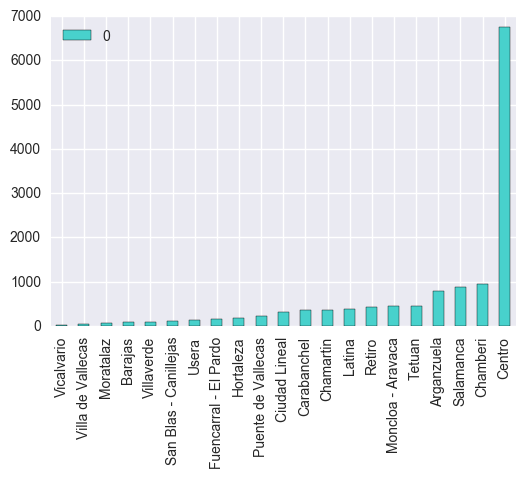

In [248]:
nb_counts = Counter(listing.neighbourhood_group_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar', color='mediumturquoise')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Usaremos CARTO para graficar nuestros mapas geolocalizados. www.carto.com<br>
</span>
</div>

In [312]:
distribution = '<iframe width="100%" height="520" frameborder="0" src="https://ronnydeabreu.carto.com/builder/92c6ad1d-36c6-4a02-b94c-b4400456137e/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>'
HTML(distribution)


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Podemos observar en el mapa que la mayor concentración de pisos están en pleno Centro de Madrid, concentrándose principalmente en Chueca, Malasaña y Lavapies<br>
</span>
</div>

<h1 style="font-size:2em;color:#2467C0">Barrios más costosos:</h1><br>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Determinemos cuáles son los barrios más costosos de la capital:</span>
</div>

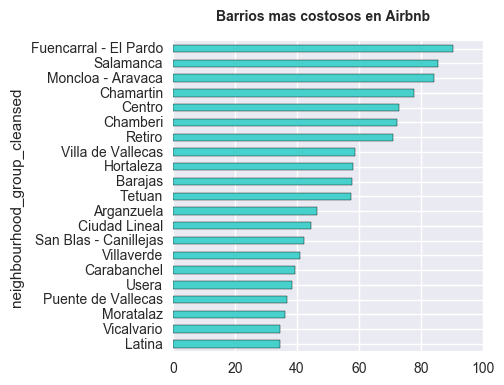

In [254]:
area2 = listing.groupby('neighbourhood_group_cleansed')
nb_price = area2['price'].agg([np.sum, np.mean, np.std]).sort_values(['mean'])

fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Barrios mas costosos en Airbnb', fontsize=10, fontweight='bold')
nb_price['mean'].plot(kind='barh', ax=ax, color='mediumturquoise')

<h1 style="font-size:2em;color:#2467C0">Relación entre el precio y demás "features" o características de los pisos.</h1><br>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Veremos de forma visual, cu´les son las caráterísticas presentes en los pisos de alquiler en Madrid y cómo están reflejados en el precio de alquiler en AirBnB</span>
</div>

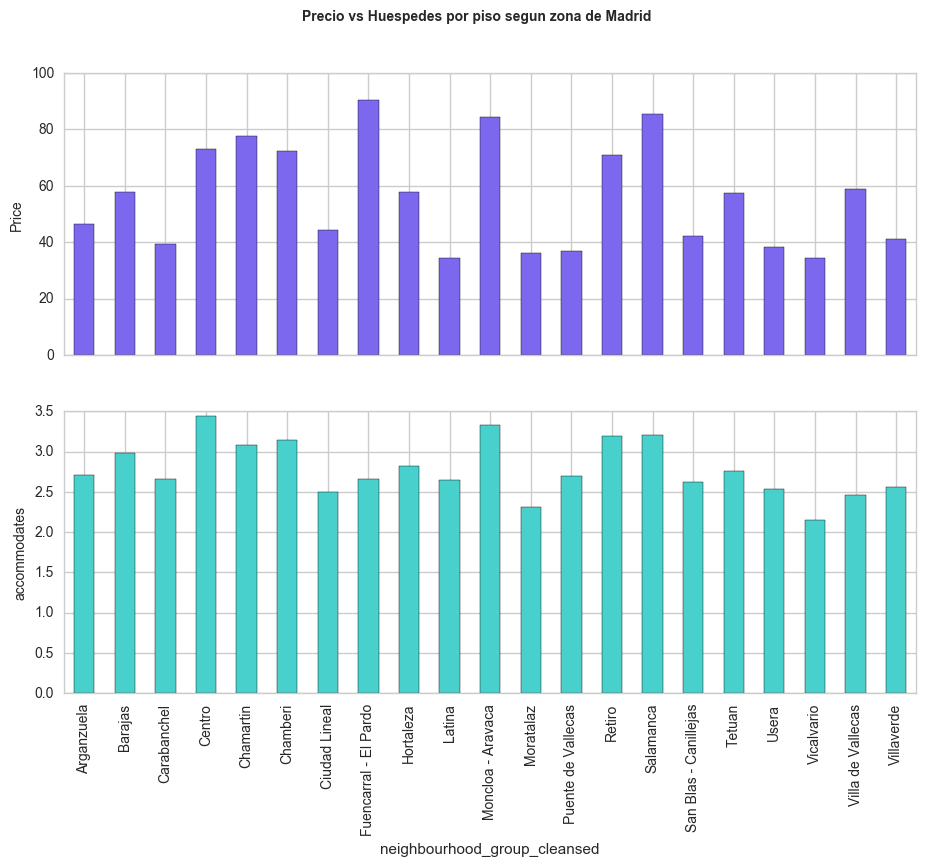

In [365]:
area = listing.groupby('neighbourhood_group_cleansed')
price = area['price'].agg([np.sum, np.mean, np.std])
accommodates = area['accommodates'].agg([np.sum, np.mean, np.std])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11, 8))
#fig.set_size_inches(15, 8)
fig.suptitle('Precio vs Huespedes por piso segun zona de Madrid', fontsize=10, fontweight='bold')
price['mean'].plot(kind='bar', ax=ax[0], color='mediumslateblue')
accommodates['mean'].plot(kind='bar', ax=ax[1], color = 'mediumturquoise')

ax[0].set_ylabel('Price', fontsize=10)
ax[1].set_ylabel('accommodates', fontsize=10)


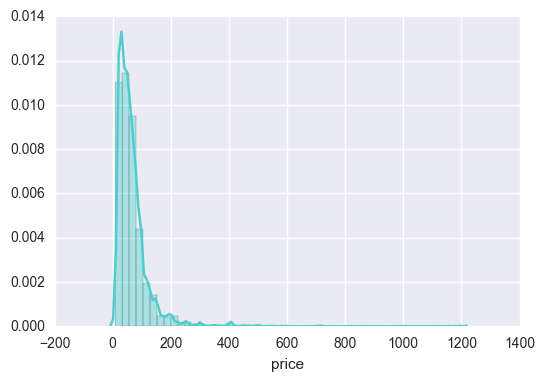

In [261]:
sns.distplot(listing['price'], color = 'mediumturquoise')
plt.show()

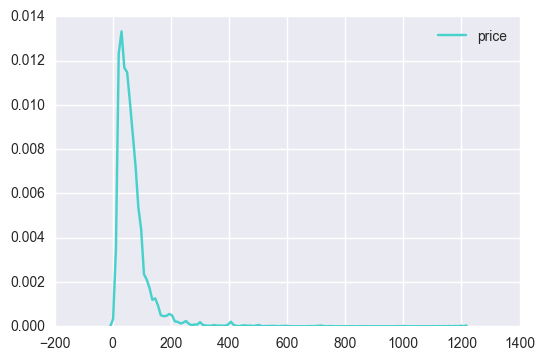

In [262]:
sns.kdeplot(listing['price'], color = 'mediumturquoise')
plt.show()

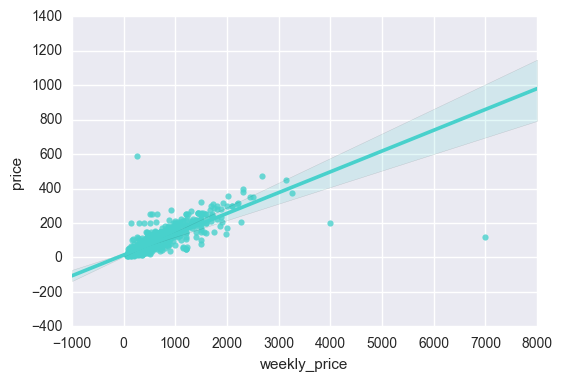

In [263]:
sns.regplot(x='weekly_price', y='price',data=listing, color = 'mediumturquoise')

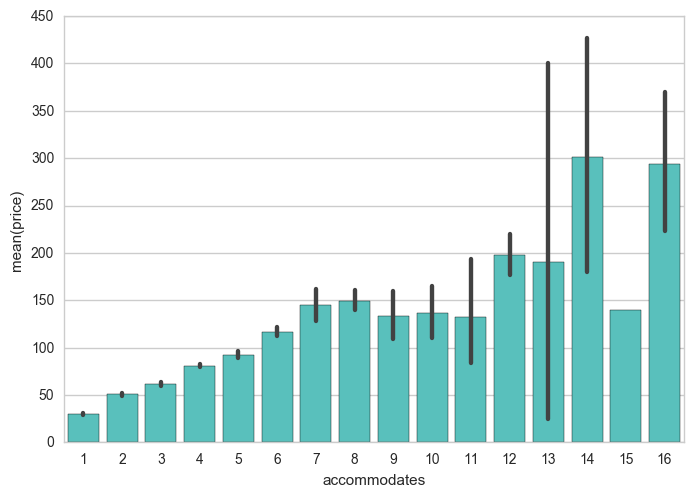

In [326]:
#sns.barplot(y='price',x='accommodates',data=listing, palette="YlGnBu")
sns.barplot(y='price',x='accommodates',data=listing, color = 'mediumturquoise')

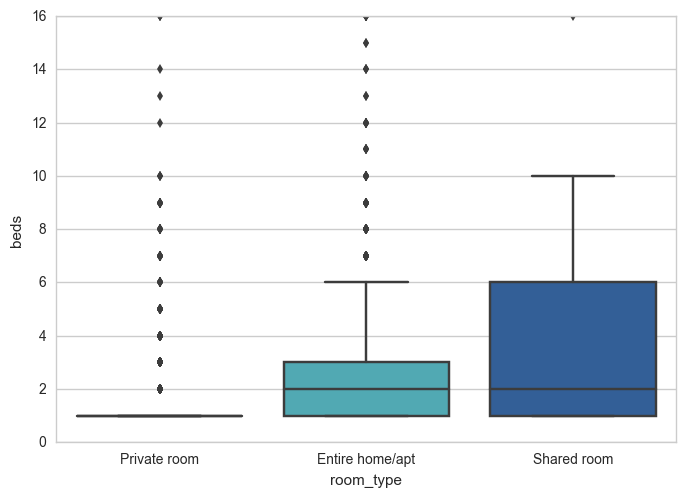

In [327]:
sns.boxplot(y='beds',x='room_type',data=listing, palette="YlGnBu")

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">Usaremos CARTO para graficar nuestros mapas geolocalizados. www.carto.com<br>
</span>
</div>

In [264]:
cb_webmap = '<iframe width="100%" height="520" frameborder="0" src="https://ronnydeabreu.carto.com/builder/ad81b96b-7d46-44be-a344-306b4f4d1d00/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>'
HTML(cb_webmap)

<h1 style="font-size:2em;color:#2467C0">Tipos de habitación:</h1><br>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Es importante conocer las diferencias entre el precio según el tipo de habitación. Vamos a agrupar los datos según la columna room_type y veremos algunos gráficos.</span>
</div>

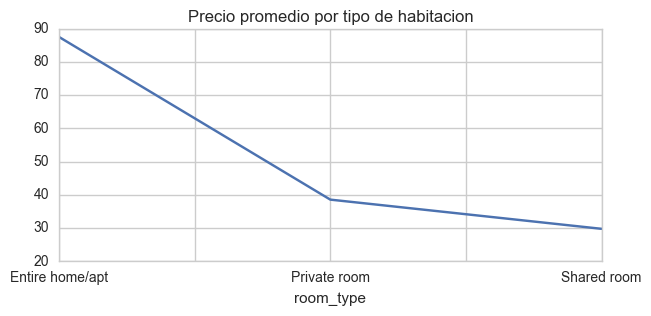

In [341]:
area = listing.groupby('room_type')
room_price = area['price'].agg([np.sum, np.mean, np.std])
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
fig.set_size_inches(7, 3)
room_price['mean'].plot(title="Precio promedio por tipo de habitacion")


In [356]:
apt = listing.loc[listing['room_type'] == 'Entire home/apt']
apt.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
8627,5327846,"LOVELY 2 BEDROOM CONDO FOR 5, 90€",27607042,Alfonso,2015-02-11,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Salamanca,28028,40.436059,-3.672990,Apartment,Entire home/apt,5,1.0,2.0,5.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",90.0,590.0,1600.0,NaN,40.0,4,10.0,3,1000,5 days ago,16,43,73,348,8,2015-08-28,2017-03-30,97.0,9.0,10.0,10.0,10.0,9.0,9.0,t,f,strict,f,f,3,0.41
6884,11782340,Nice apartment Madrid center WIFI,62739184,Carmen,2016-03-13,t,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Arganzuela,28005,40.402327,-3.705738,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",65.0,NaN,NaN,NaN,10.0,1,0.0,2,1125,2 months ago,0,0,8,209,45,2016-04-12,2017-03-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,1,3.73
321,2846776,Historic center - Cava Baja,4416684,Gonzalo,2012-12-16,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Centro,28005,40.412037,-3.710250,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",65.0,380.0,1150.0,NaN,25.0,1,0.0,4,1125,today,2,6,12,265,83,2014-05-09,2017-03-24,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,1,2.34
3568,3189464,PASEO DEL PRADO II,1408525,Mad4Rent,2011-11-15,f,51.0,51.0,"['email', 'phone', 'reviews', 'jumio']",t,t,Centro,28014,40.414392,-3.694820,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",85.0,468.0,1870.0,$200.00,33.0,2,10.0,4,1125,today,12,26,45,297,20,2014-09-30,2017-02-27,77.0,8.0,8.0,9.0,9.0,9.0,8.0,t,t,moderate,f,t,51,0.65
2738,7282895,LOFT EN EL CENTRO DE MADRID MUSEOS,4839888,Alicia,2013-01-25,f,12.0,12.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Centro,28012,40.410392,-3.698411,Loft,Entire home/apt,4,2.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",90.0,NaN,NaN,NaN,15.0,2,15.0,2,1125,3 days ago,14,41,71,346,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,moderate,f,f,12,NaN


<h1 style="font-size:2em;color:#2467C0">Diagrama de violín:</h1><br>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Arial'; font-size: 1.5em;">
Diagrama de violín</span>
</div>

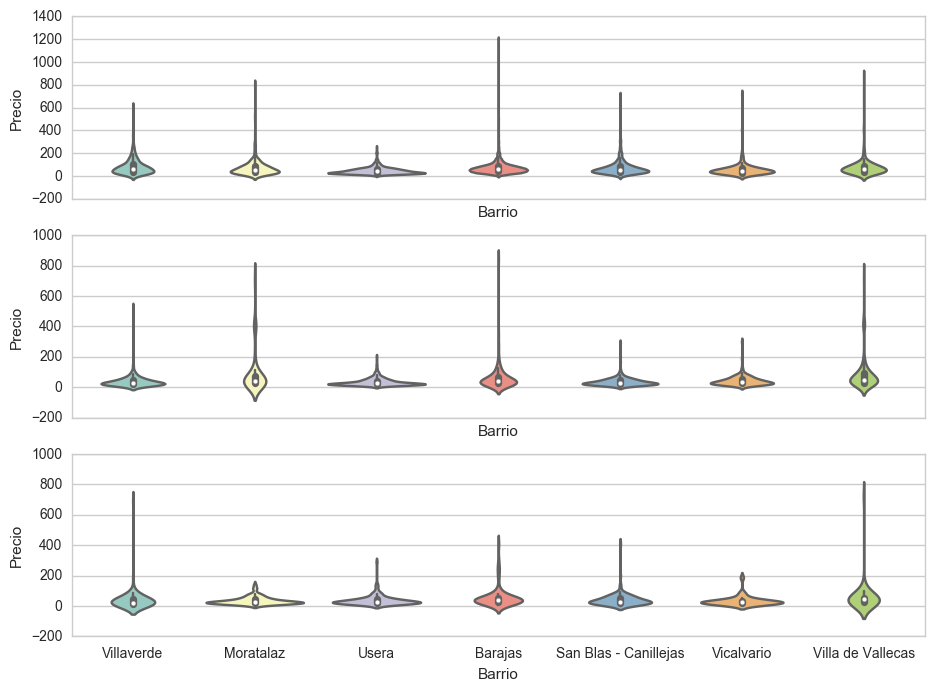

In [404]:
first = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') ]

second = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
                     (listing['neighbourhood_group_cleansed'] == 'Latina') |
                     (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
                     (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
                     (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
                     (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')]

third = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Usera') |
                     (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
                     (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
                     (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
                     (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
                     (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]

f, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(11, 8))
a = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=first, ax=ax[0], palette="Set3")
b = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=second, ax=ax[1], palette="Set3")
c = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=third, ax=ax[2], palette="Set3")

a.set(xlabel='Barrio', ylabel='Precio')
b.set(xlabel='Barrio', ylabel='Precio')
c.set(xlabel='Barrio', ylabel='Precio')
plt.show()


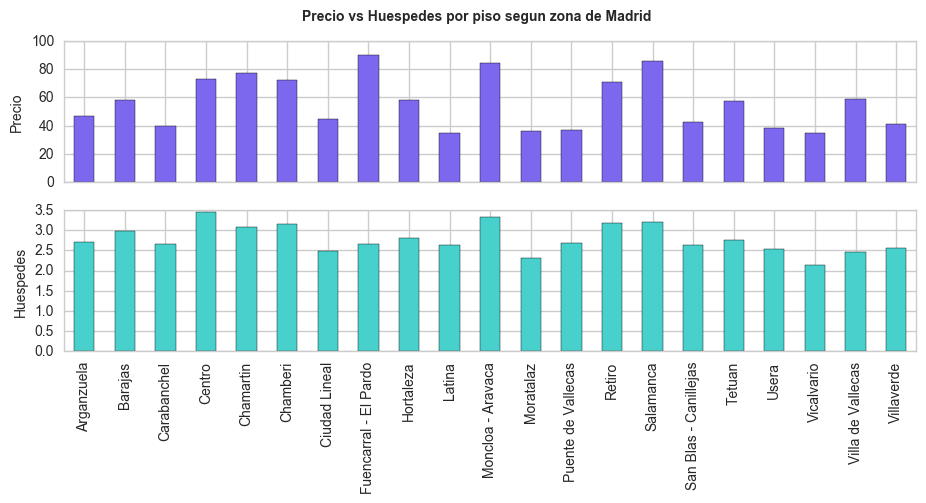

In [413]:
area = listing.groupby('neighbourhood_group_cleansed')
price = area['price'].agg([np.sum, np.mean, np.std])
accommodates = area['accommodates'].agg([np.sum, np.mean, np.std])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(11, 4))
fig.suptitle('Precio vs Huespedes por piso segun zona de Madrid', fontsize=10, fontweight='bold')
price['mean'].plot(kind='bar', ax=ax[0], color='mediumslateblue')
accommodates['mean'].plot(kind='bar', ax=ax[1], color = 'mediumturquoise')

ax[0].set_ylabel('Precio', fontsize=10)
ax[1].set_ylabel('Huespedes', fontsize=10)
ax[1].set_xlabel('', fontsize=10)


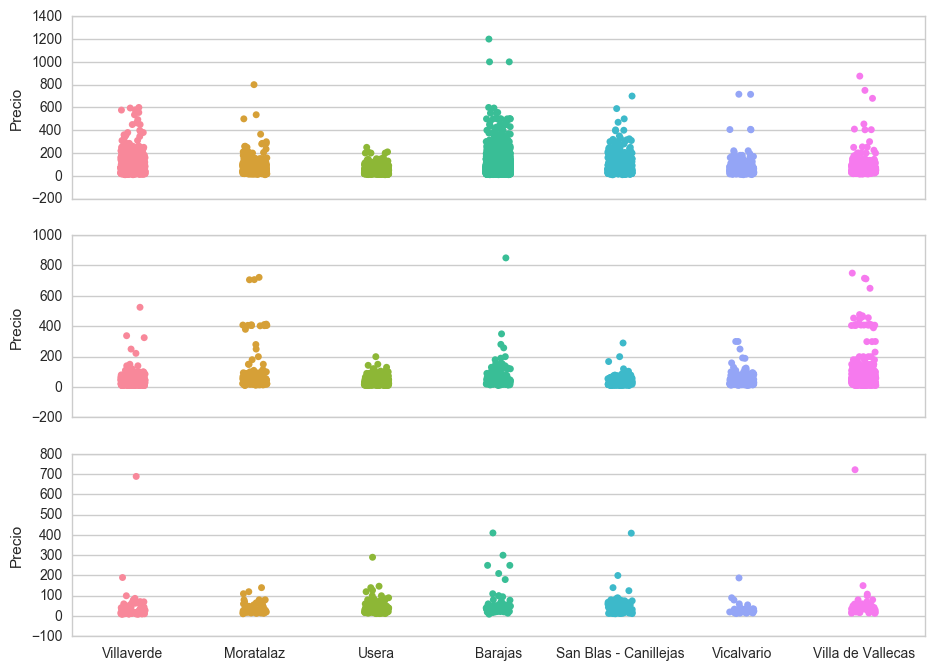

In [420]:
f, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(11, 8))

a = sns.stripplot(data=first,y='price',x='neighbourhood_group_cleansed',jitter=True, ax=ax[0])
b = sns.stripplot(data=second,y='price',x='neighbourhood_group_cleansed',jitter=True, ax=ax[1])
c = sns.stripplot(data=third,y='price',x='neighbourhood_group_cleansed',jitter=True, ax=ax[2])

a.set(xlabel='', ylabel='Precio')
b.set(xlabel='', ylabel='Precio')
c.set(xlabel='', ylabel='Precio')
plt.show()


KeyboardInterrupt: 

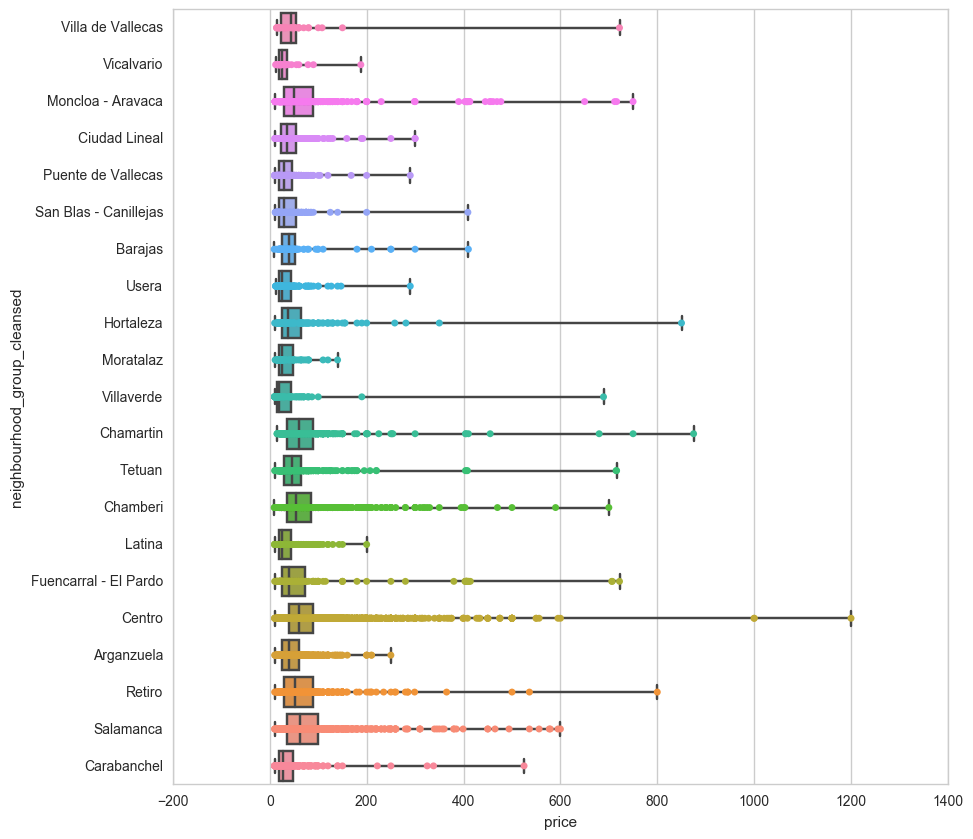

In [426]:
all_nei = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') |
            (listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
            (listing['neighbourhood_group_cleansed'] == 'Latina') |
            (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
            (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
            (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
            (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')|
            (listing['neighbourhood_group_cleansed'] == 'Usera') |
            (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
            (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
            (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
            (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
            (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]


fig, ax = plt.subplots(figsize=(10, 10))



sns.boxplot(x="price", y="neighbourhood_group_cleansed", data=all_nei, whis=np.inf, ax=ax)
sns.swarmplot(x="price", y="neighbourhood_group_cleansed", data=all_nei, ax=ax)